# SVM (Support Vector Machines)

![](../Data/svm_model.png)

### SVM을 활용한 BMI 측정 예측
- BMI = 몸무게 (kg) / 키(m) *키(m) 
- BMI가 18.5 이상 23미만 일때 표준몸무게 

In [24]:
# 데이터를 획득하기 위해 무작위로 2만명 데이터 생성
# 키(cm), 몸무게(kg), label[저체중(thin), 정상체중(normal),비만(fat)]의 csv 생성

import random

#BMI를 계산해서 label을 return 하는 함수 
def calc_bmi(h,w):  # height,weight
    bmi = w / (h/100) ** 2 
    if bmi < 18.5 : return "thin"
    if bmi < 25 : return "normal"
    return "fat"

# 저장 파일 준비
fp = open("../Data/bmi.csv",'w', encoding="utf-8")
fp.write("height,weight,label\r\n")

# 무작위로 데이터 생성하기
cnt = {"thin":0, "normal":0, "fat":0}

for i in range(20000):
    # 범위 설정 
    h = random.randint(120,200)
    w = random.randint(35,80)
    # thin,normal,fat으로 반환 
    label = calc_bmi(h,w)
    cnt[label] += 1
    fp.write("{0},{1},{2}\r\n".format(h,w,label))
fp.close()
print("ok : ",cnt)

ok :  {'thin': 6392, 'normal': 6055, 'fat': 7553}


## bmi공식을 사용하지 않고 bmi예측

In [25]:
import pandas as pd

In [26]:
# 데이터 불러오기 
tbl = pd.read_csv("../Data/bmi.csv")
tbl.head()

,height,weight,label
0,161,67,fat
1,145,77,fat
2,177,40,thin
3,149,78,fat
4,162,75,fat


> 데이터 편차가 큰 "한 개의" 컬럼에만 사용하는게 "정규화", 전체 데이터셋에 적용하는게 "표준화" 이다. 

In [3]:
# 컬럼을 분리하여 정규화 하기 
tbl.describe()

,height,weight
count,20000.000000,20000.000000
mean,160.029700,57.469750
std,23.394599,13.210947
min,120.000000,35.000000
25%,140.000000,46.000000
50%,160.000000,57.000000
75%,180.000000,69.000000
max,200.000000,80.000000


In [27]:
label = tbl['label']
w= tbl['weight'] / 80
h = tbl['height'] / 200

In [28]:
# 필요한 열 추출하기
tbl_data = tbl[['weight','height']]
tbl_label = tbl['label']

In [29]:
# 학습용과 훈련용 나누기 
from sklearn.model_selection import train_test_split
train_data, test_data, train_label, test_label = train_test_split(
    tbl_data, tbl_label
)

In [38]:
#데이터 학습 시키고 예측
from sklearn import svm, metrics
clf = svm.SVC()
# 학습 
clf.fit(train_data,train_label)
# 예측 
pred = clf.predict(test_data)
print(pred)

['normal' 'normal' 'fat' ... 'normal' 'thin' 'normal']


In [39]:
# 정확도 구하기 
ac_score = metrics.accuracy_score(test_label, pred)
print("정확도 :",ac_score)

정확도 : 0.997


In [40]:
# confusion matrix
from sklearn import metrics
cl_report = metrics.classification_report(test_label,pred)
print(cl_report)

              precision    recall  f1-score   support

         fat       1.00      1.00      1.00      1875
      normal       0.99      1.00      1.00      1526
        thin       1.00      0.99      1.00      1599

    accuracy                           1.00      5000
   macro avg       1.00      1.00      1.00      5000
weighted avg       1.00      1.00      1.00      5000



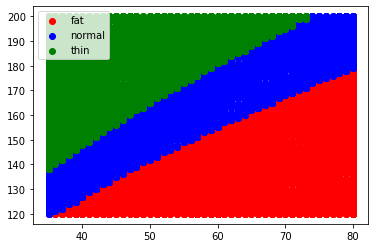

In [21]:
# 시각화
import matplotlib.pyplot as plt
tbl = pd.read_csv("../Data/bmi.csv",index_col=2) #label column
fig = plt.figure()
ax = fig.add_subplot(1,1,1)

def scatter(lbl, color):
    b = tbl.loc[lbl]
    ax.scatter(b['weight'],b['height'],c=color,label=lbl)

scatter("fat","red")
scatter("normal","blue")
scatter("thin","green")
ax.legend()
# 저장
plt.savefig("../Data/bmi-test.png")
plt.show()

# SVM의 종류 
- SVC(classification)
- NuSVC
- LinearSVC: svm중 가장 빠름. svc 대비 약 3배정도 빠름

In [41]:
# 데이터 학습
clf = svm.LinearSVC()
# 학습 
clf.fit(train_data,train_label)
# 예측 
pred = clf.predict(test_data)
print(pred)

['fat' 'thin' 'fat' ... 'thin' 'thin' 'fat']


/Users/tj/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


In [42]:
# 정확도 구하기 
ac_score = metrics.accuracy_score(test_label, pred)
print("정확도 :",ac_score)

정확도 : 0.716


In [43]:
cl_report = metrics.classification_report(test_label,pred)
print(cl_report)

              precision    recall  f1-score   support

         fat       0.67      1.00      0.80      1875
      normal       1.00      0.07      0.13      1526
        thin       0.76      1.00      0.86      1599

    accuracy                           0.72      5000
   macro avg       0.81      0.69      0.60      5000
weighted avg       0.80      0.72      0.62      5000

